In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
warnings.filterwarnings('ignore')

In [2]:
iris_load = load_iris()

In [3]:
iris = pd.DataFrame(iris_load.data, columns = iris_load.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# using 0,1 and 2 to classify the flowers into 3 different classes - supervised machine learning

iris['class'] = pd.Series(iris_load.target)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# just looking at 2 of the 4 features
features = ['petal length (cm)', 'petal width (cm)']

In [6]:
flower_class = ['class']

In [7]:
x = iris[features]
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [8]:
y = iris[flower_class]

In [9]:
# splitting the data into training and testing sets for the features and the output

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [11]:
# running the test of our x_test data into the KNN prediction model

y_pred = KNN.predict(x_test)
y_predall = KNN.predict(x)
# for plotting the entire data comparison later

In [12]:
# loading the metrics
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



### Classifying the flowers based on petal length and petal width

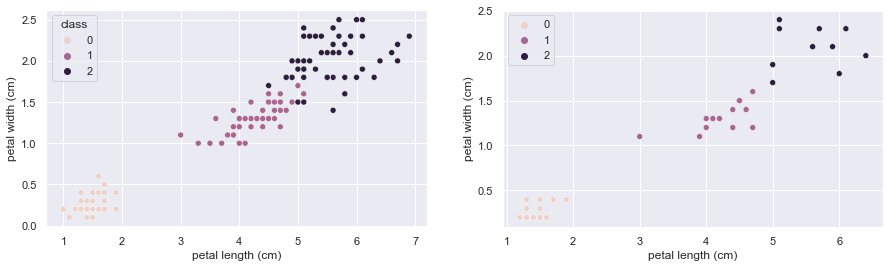

In [13]:
# left graph is ground truth data, right graph is what the model is predicting
# less data here as the test data is a sample of the the full dataset

sns.set()
cmap = sns.cubehelix_palette(as_cmap = True)

fig, axs = plt.subplots(1, 2, figsize=(15, 4))

sns.scatterplot(x = iris['petal length (cm)'], y = iris['petal width (cm)'], hue = iris['class'], ax = axs[0])
sns.scatterplot(x = x_test['petal length (cm)'], y = x_test['petal width (cm)'], hue = y_pred, ax = axs[1]);

### Classifying the flowers based on sepal length and sepal width

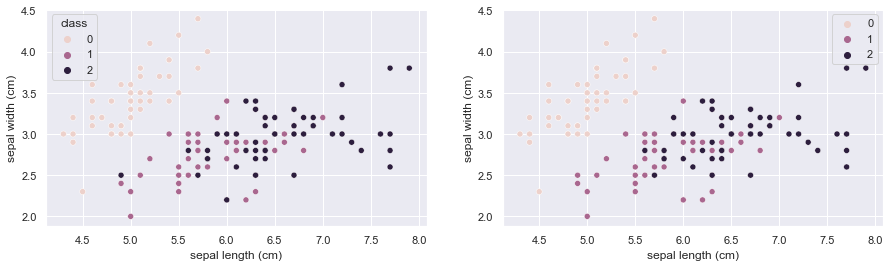

In [14]:
# left graph is ground truth data, right graph is what the model is predicting
# less data here as the test data is a sample of the the full dataset

sns.set()
cmap = sns.color_palette(as_cmap = True)

fig, axs = plt.subplots(1, 2, figsize=(15, 4))

sns.scatterplot(x = iris['sepal length (cm)'], y = iris['sepal width (cm)'], hue = iris['class'], cmap = 'mako', ax = axs[0])
sns.scatterplot(x = iris['sepal length (cm)'], y = iris['sepal width (cm)'], hue = y_predall, cmap = 'mako', ax = axs[1]);

### How many K's (number of classes to use to classify the data)

In [17]:
from sklearn.metrics import accuracy_score

acc = []
for i in range (1, 10):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train, y_train)
    Kpredict = KNN.predict(x_test)
    accuracy = accuracy_score(y_test, Kpredict)
    acc.append(accuracy)
    
print(acc)

[1.0, 1.0, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158]


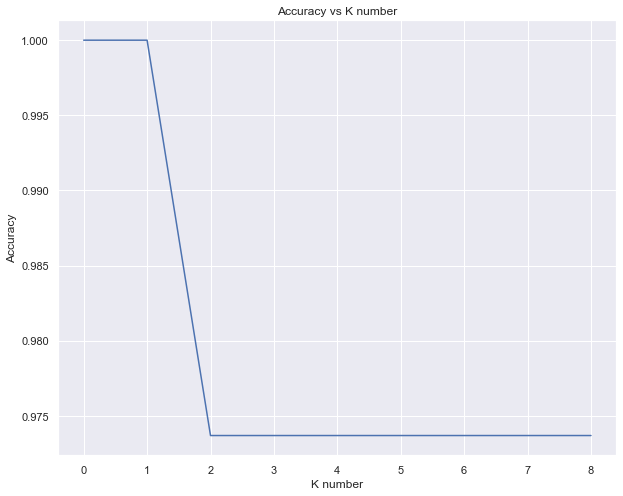

In [19]:
# graph showing the optimal number of neighbors to include - although it seems like a significant drop in accuracy
# from first glance, the accuracy only decreased by 0.025 from using 1 neighbor to using 2.

plt.figure(figsize = (10, 8))
plt.plot(acc, markersize = 10)
plt.title('Accuracy vs K number')
plt.xlabel('K number')
plt.ylabel('Accuracy');